In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('Week8_train.csv')
df1 = pd.read_csv('Week8_test.csv')
df.shape

(110899, 483)

In [3]:
df.TARGET.value_counts()

0    89367
1    21532
Name: TARGET, dtype: int64

In [4]:
df1.shape

(110899, 482)

In [5]:
df_new = df.drop(columns=['PARTY_ID'])
df_valid = df1.drop(columns=['PARTY_ID'])
df_new.head()

,id,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.000000,0.0,0.0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,26.010373,0.0,0.0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2248.357090,0.0,0.0,1
3,3,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,2285.146561,0.0,0.0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,98.395599,0.0,0.0,0


In [6]:
cols = df_new.columns
d_cols = []
v_cols = df_valid.columns
for col in cols:
    if(df_new[col].isna().sum()>0):
        df_new.drop(columns=[col],inplace=True)
        d_cols.append(col)
for col in d_cols:
    df_valid.drop(columns=[col],inplace=True)
v_cols = list(set(v_cols) - set(d_cols))

In [7]:
df_new.shape
df_valid.shape

(110899, 478)

In [8]:
cols = df_new.columns
num_cols = df._get_numeric_data().columns

nonnum_cols = list(set(cols) - set(num_cols))
print(nonnum_cols)

['V_400', 'V_316', 'V_245', 'V_410', 'V_271']


In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in nonnum_cols:
    df_new[i] = le.fit_transform(df_new[i])
for i in nonnum_cols:
    df_valid[i] = le.fit_transform(df_valid[i])

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

df_new = pd.DataFrame(scaling.fit_transform(df_new),columns=cols)
df_valid = pd.DataFrame(scaling.fit_transform(df_valid),columns=v_cols)

df_new.head()

,id,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_474,V_475,V_476,V_477,V_478,V_479,V_480,V_481,V_482,TARGET
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02439,0.000000,0.000000,0.0,0.0,0.0
1,0.000009,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.086957,0.000068,0.0,0.0,0.0
2,0.000018,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02439,0.000000,0.005879,0.0,0.0,1.0
3,0.000027,0.0,0.0,0.0,0.0,0.008929,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.005976,0.0,0.0,0.0
4,0.000036,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000257,0.0,0.0,0.0


In [11]:
x = df_new.drop(columns = ['TARGET'])
y = df_new["TARGET"]

In [12]:
# #Hyper_Parameter Tuning
# import xgboost as xgb

# from sklearn.model_selection import RandomizedSearchCV
# rcv_parameters = {'n_estimators' : [100,300,500,700,900,1000],
#               'max_depth' : [2,3,5,10,15],
#               'booster' : ['gbtree','gblinear'],
#               'learning_rate' : [0.05,0.1,0.15,0.2],
#               'min_child_weight' : [1,2,3,4]}
# model = xgb.XGBClassifier(n_jobs=-1)
# rdmsearch = RandomizedSearchCV(model,param_distributions=rcv_parameters,n_jobs=-1,n_iter=40,cv=5)
# rdmsearch.fit(x_train,y_train)
# rdmsearch.best_params_


In [13]:
# from scipy import stats as st
# x_cols = x.columns.to_list()
# for col in x_cols:
#     r , p = st.spearmanr(x[col],y)
#     if(abs(r)<0.1):
#         x.drop(columns=[col],inplace=True)
# x


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x,y,test_size=0.3)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
print(logreg.score(x_train,y_train))
print(logreg.score(x_valid,y_valid))

y_pred = logreg.predict(x_valid)
# # print(accuracy_score(y_pred,y_valid)
print(r2_score(y_pred,y_valid))
    

0.8274227415012431
0.8257288848812744
-4.707113488651079


c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.ensemble import RandomForestClassifier
dtree = RandomForestClassifier()
dtree.fit(x_train,y_train)
dtree.score(x_valid,y_valid)

0.8333333333333334

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.score(x_valid,y_valid)

0.8348061316501353

In [17]:
import xgboost as xgb 
xgbc = xgb.XGBClassifier()
xgbc.fit(x_train,y_train)
xgbc.score(x_valid,y_valid)

0.8305680793507665

<BarContainer object of 478 artists>

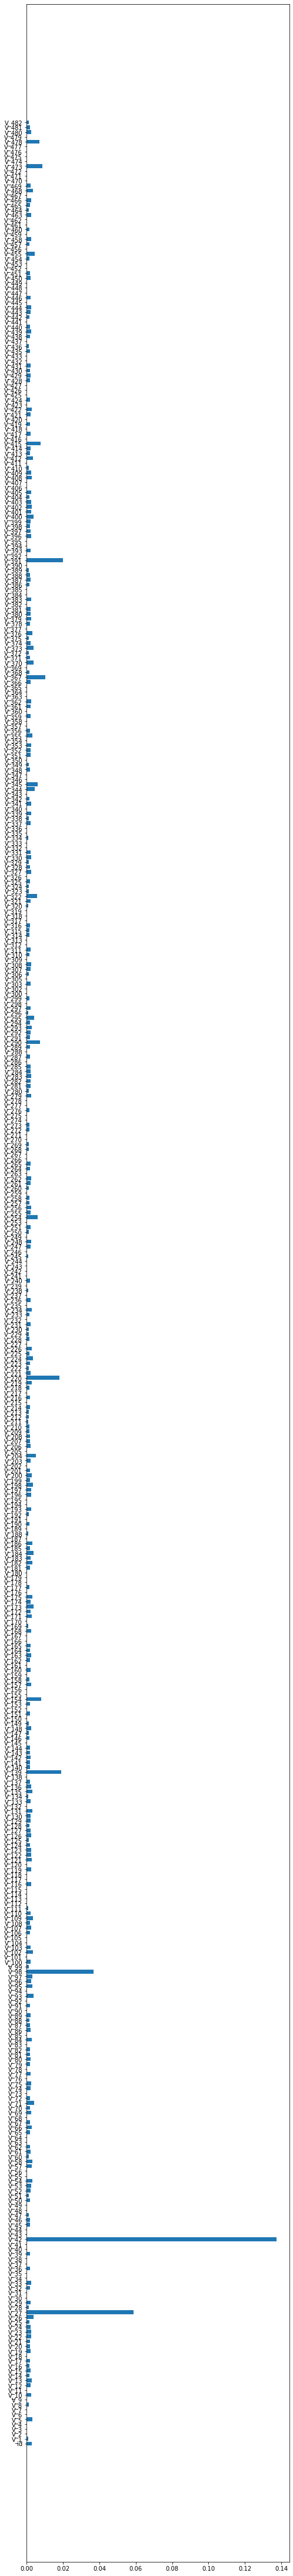

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,80))
plt.barh(x_train.columns, xgbc.feature_importances_)

In [19]:
from sklearn.decomposition import PCA
sklearn_PCA = PCA(n_components=478)
x_train_transformed = sklearn_PCA.fit_transform(x_train)

In [20]:
var_array = sklearn_PCA.explained_variance_ratio_ *100
var_list = []
sum = 0 
for i in var_array:
    if(sum<95):
        sum = sum + i
        var_list.append(i)

len(var_list)

76

In [21]:
from sklearn.decomposition import PCA
sklearn_PCA=PCA(n_components=76)
x_train_transformed = sklearn_PCA.fit_transform(x_train)
x_valid_transformed = sklearn_PCA.fit_transform(x_valid)

In [22]:
dtree2 = RandomForestClassifier()
dtree2.fit(x_train_transformed,y_train)
dtree2.score(x_valid_transformed,y_valid)

0.8036669672377518

In [23]:
xgbc2 = xgb.XGBClassifier()
xgbc2.fit(x_train_transformed,y_train)
xgbc2.score(x_valid_transformed,y_valid)

0.7957619477006312

In [24]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(x_train_transformed,y_train)
gbc2.score(x_valid_transformed,y_valid)

0.8093477607454163

In [25]:
print("Before Dimensionality Reduction")
print("Accuracy using Random Forest Classifier :",dtree.score(x_valid,y_valid))
print("Accuracy using Gradient Boosting Classifier :",gbc.score(x_valid,y_valid))
print("Accuracy using Extreme Gradient Boosting Classifier :",xgbc.score(x_valid,y_valid))

print("After Variance Analysis and Dimenisionality Reduction")
print("Accuracy using Random Forest Classifier :",dtree2.score(x_valid_transformed,y_valid))
print("Accuracy using Gradient Boosting Classifier :",gbc2.score(x_valid_transformed,y_valid))
print("Accuracy using Extreme Gradient Boosting Classifier :",xgbc2.score(x_valid_transformed,y_valid))

Before Dimensionality Reduction
Accuracy using Random Forest Classifier : 0.8333333333333334
Accuracy using Gradient Boosting Classifier : 0.8348061316501353
Accuracy using Extreme Gradient Boosting Classifier : 0.8305680793507665
After Variance Analysis and Dimenisionality Reduction
Accuracy using Random Forest Classifier : 0.8036669672377518
Accuracy using Gradient Boosting Classifier : 0.8093477607454163
Accuracy using Extreme Gradient Boosting Classifier : 0.7957619477006312


In [40]:
df_valid_transformed = sklearn_PCA.fit_transform(df_valid)
test_op1 = gbc2.predict(df_valid_transformed)
test_op1

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
result1 = pd.DataFrame(df1['id'], columns = ['id'])
result1['TARGET']= test_op1.astype(int)
result1.to_csv("submission0.csv", index=False)

In [42]:
test_op2 = gbc.predict(df_valid)
test_op2

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([0., 0., 0., ..., 0., 0., 0.])

In [43]:
result2 = pd.DataFrame(df1['id'], columns = ['id'])
result2['TARGET']= test_op2.astype(int)
result2.to_csv("submission1.csv", index=False)

In [44]:
result1['TARGET'].value_counts()

0    108762
1      2137
Name: TARGET, dtype: int64

In [45]:
result2['TARGET'].value_counts()

0    105337
1      5562
Name: TARGET, dtype: int64